In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import TargetEncoder

In [26]:
data=pd.read_csv(r"C:\Users\Admin\Downloads\car_price_prediction.csv")

In [27]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [28]:
data.drop(columns= ["ID","Doors"],inplace=True)

In [29]:
data.head(3)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2


In [30]:
data.Levy  = data.Levy.replace("-",np.nan)

In [31]:
data.Levy = pd.to_numeric(data.Levy)
data.Levy = data.Levy.fillna(value=int(data.Levy.mean())).astype(int)

In [32]:
data.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8
2,8467,906,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4


In [33]:
data["Mileage"] = data["Mileage"].str.replace(" km", "")
data["Mileage"] = pd.to_numeric(data["Mileage"])

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  int32  
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  object 
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  object 
 9   Mileage           19237 non-null  int64  
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Wheel             19237 non-null  object 
 14  Color             19237 non-null  object 
 15  Airbags           19237 non-null  int64  
dtypes: float64(1), int32(1), int64(4), objec

In [35]:
data.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,Left wheel,Black,8
2,8467,906,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,Silver,4


In [36]:
data["Engine volume"] = data["Engine volume"].str.replace("Turbo", "")
data["Engine volume"] = pd.to_numeric(data["Engine volume"])

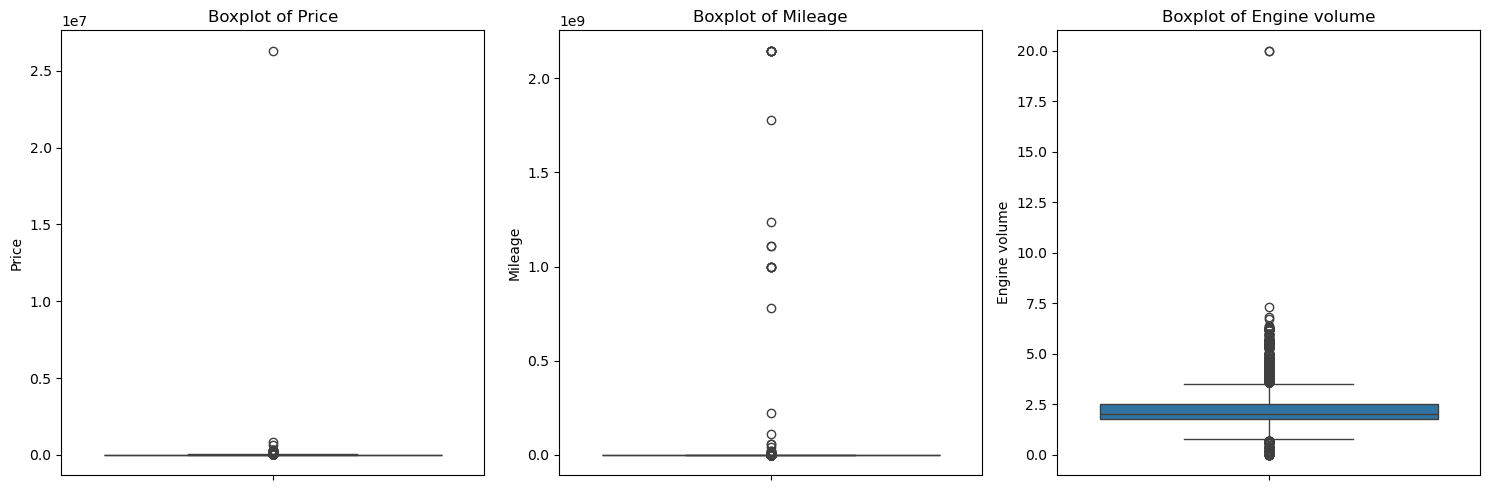

In [37]:
columns_to_plot = ['Price', 'Mileage', 'Engine volume']

plt.figure(figsize=(15, 5))
for i, column in enumerate(columns_to_plot):
    plt.subplot(1, len(columns_to_plot), i + 1)
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
plt.tight_layout()
plt.show()

In [38]:
data.Price.skew()

136.47042654268714

In [39]:
data.duplicated().sum()

3512

In [40]:
data.drop_duplicates(inplace=True)

In [41]:
data.Price.skew()

123.6340713570889

In [42]:
data["Price_log"] = np.log1p(data["Price"])
print(data["Price_log"].skew())

-1.7938697666327585


<Axes: ylabel='Price_log'>

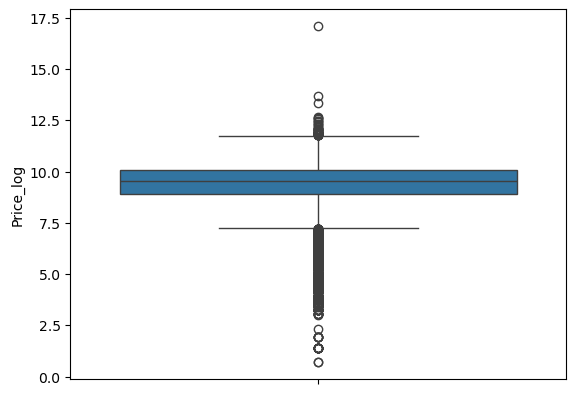

In [43]:
sns.boxplot(y=data["Price_log"])

In [44]:
Q1 = data["Price_log"].quantile(0.25)
Q3 = data["Price_log"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = data[(data["Price_log"] >= lower_bound) & (data["Price_log"] <= upper_bound)]

In [45]:
data.shape , df_clean.shape

((15725, 17), (14125, 17))

<Axes: ylabel='Price_log'>

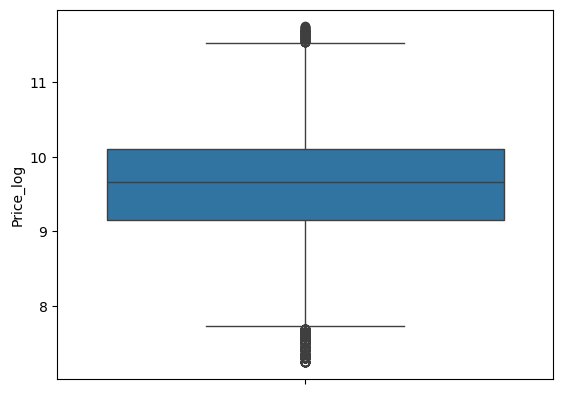

In [46]:
sns.boxplot(y=df_clean["Price_log"])

<Axes: >

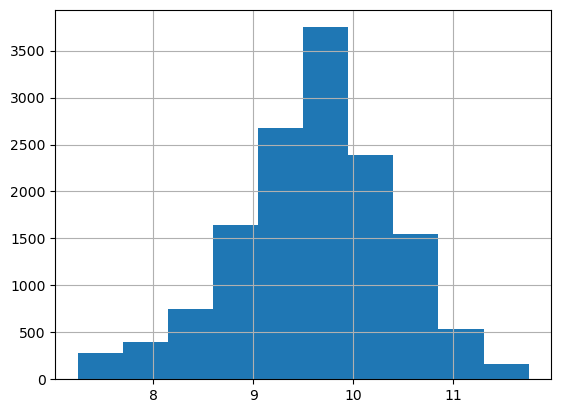

In [47]:
df_clean["Price_log"].hist()

<Axes: ylabel='Mileage'>

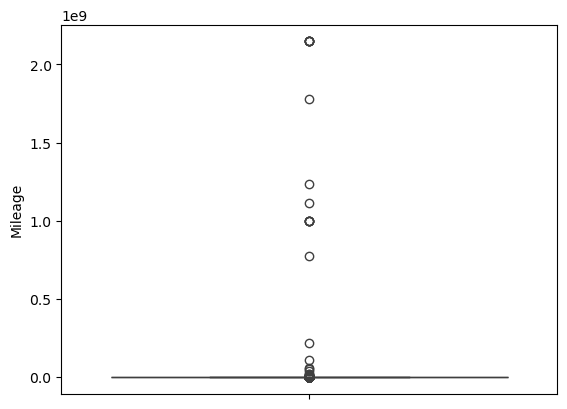

In [48]:
sns.boxplot(y=df_clean["Mileage"])

In [49]:
df_clean["Mileage"].skew()

35.59856847357023

In [50]:
df_clean["Mileage_log"] = np.log1p(df_clean["Mileage"])

C:\Users\Admin\AppData\Local\Temp\ipykernel_17288\3502538242.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Mileage_log"] = np.log1p(df_clean["Mileage"])


In [53]:
df_clean["Mileage_log"].skew()

-3.6879460889107385

<Axes: ylabel='Mileage_log'>

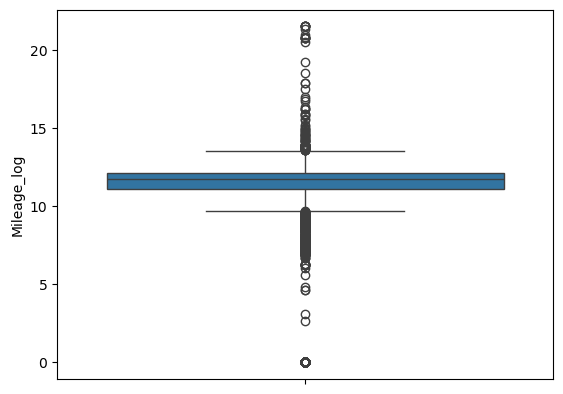

In [54]:
sns.boxplot(y=df_clean["Mileage_log"])

In [55]:
df_clean.shape


(14125, 18)

In [56]:
Q1 = df_clean["Price_log"].quantile(0.25)
Q3 = df_clean["Price_log"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df_clean[(df_clean["Price_log"] >= lower_bound) & (df_clean["Price_log"] <= upper_bound)]

In [57]:
df_clean.shape

(13787, 18)

<Axes: ylabel='Mileage_log'>

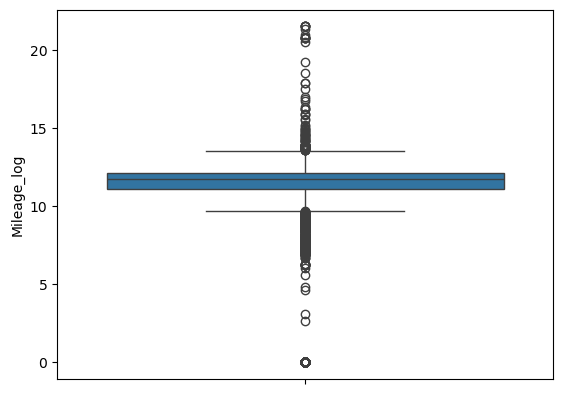

In [58]:
sns.boxplot(y=df_clean["Mileage_log"])

In [59]:
df_clean.Mileage_log.skew()

-3.727233431941192

<Axes: ylabel='Engine volume'>

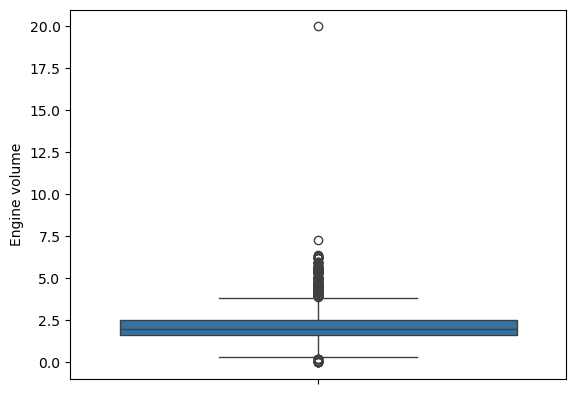

In [60]:
sns.boxplot(y=df_clean["Engine volume"])

In [61]:
df_clean["Engine volume"].skew()

2.483880146556732

In [62]:
df_clean["Volume_log"] = np.log1p(df_clean["Engine volume"])


In [63]:
df_clean["Volume_log"].skew()

0.8088368863708517

<Axes: ylabel='Volume_log'>

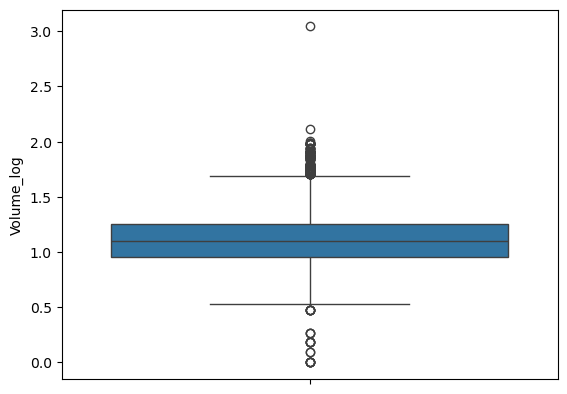

In [64]:
sns.boxplot(y=df_clean["Volume_log"])

In [65]:
df_clean.shape

(13787, 19)

In [66]:
Q1 = df_clean["Volume_log"].quantile(0.25)
Q3 = df_clean["Volume_log"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df_clean[(df_clean["Volume_log"] >= lower_bound) & (df_clean["Volume_log"] <= upper_bound)]

In [67]:
df_clean.shape

(13419, 19)

<Axes: ylabel='Volume_log'>

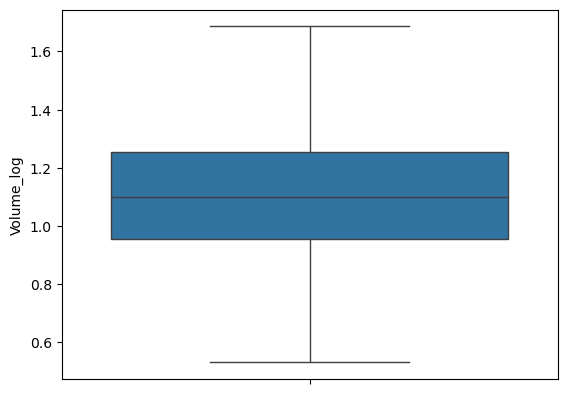

In [68]:
sns.boxplot(y=df_clean["Volume_log"])

In [69]:
df_clean.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Price_log,Mileage_log,Volume_log
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,Silver,12,9.497697,12.133534,1.504077
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,Left wheel,Black,8,9.718482,12.165256,1.386294
2,8467,906,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,Black,2,9.044050,12.206078,0.832909
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,White,0,8.190909,12.037459,1.252763
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,Silver,4,9.369649,11.428478,0.832909


In [70]:
data = df_clean.drop(columns=["Model","Price","Mileage","Engine volume"])

In [71]:
data.head()

,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Price_log,Mileage_log,Volume_log
0,1399,LEXUS,2010,Jeep,Yes,Hybrid,6.0,Automatic,4x4,Left wheel,Silver,12,9.497697,12.133534,1.504077
1,1018,CHEVROLET,2011,Jeep,No,Petrol,6.0,Tiptronic,4x4,Left wheel,Black,8,9.718482,12.165256,1.386294
2,906,HONDA,2006,Hatchback,No,Petrol,4.0,Variator,Front,Right-hand drive,Black,2,9.044050,12.206078,0.832909
3,862,FORD,2011,Jeep,Yes,Hybrid,4.0,Automatic,4x4,Left wheel,White,0,8.190909,12.037459,1.252763
4,446,HONDA,2014,Hatchback,Yes,Petrol,4.0,Automatic,Front,Left wheel,Silver,4,9.369649,11.428478,0.832909


<Axes: xlabel='count', ylabel='Manufacturer'>

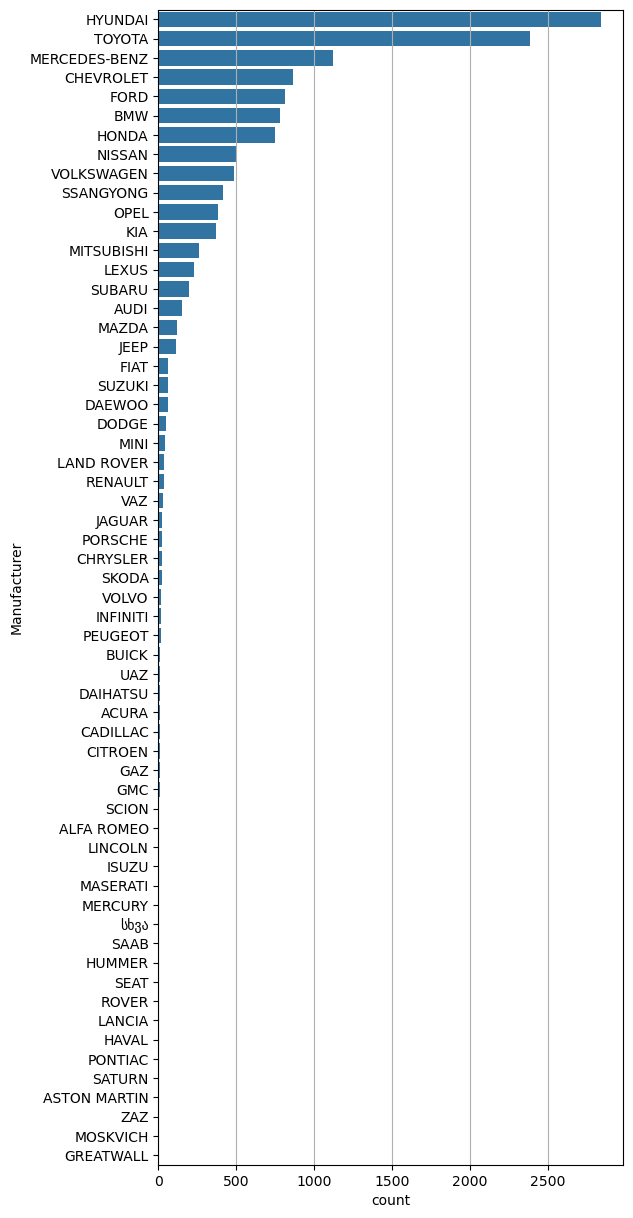

In [72]:
plt.figure(figsize=(6, 15))
plt.grid()
sns.barplot(data.Manufacturer.value_counts(),orient="y")

In [73]:
rare = data.Manufacturer.value_counts()

In [74]:
Others =  list(dict(rare[rare < 50]).keys())
data.Manufacturer = data.Manufacturer.apply(lambda x: "Others" if x in Others else x)

In [75]:
data.Manufacturer.value_counts()

Manufacturer
HYUNDAI          2845
TOYOTA           2386
MERCEDES-BENZ    1123
CHEVROLET         863
FORD              816
BMW               778
HONDA             749
NISSAN            502
VOLKSWAGEN        486
SSANGYONG         414
Others            395
OPEL              383
KIA               367
MITSUBISHI        264
LEXUS             229
SUBARU            196
AUDI              152
MAZDA             119
JEEP              114
FIAT               64
SUZUKI             63
DAEWOO             61
DODGE              50
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Manufacturer'>

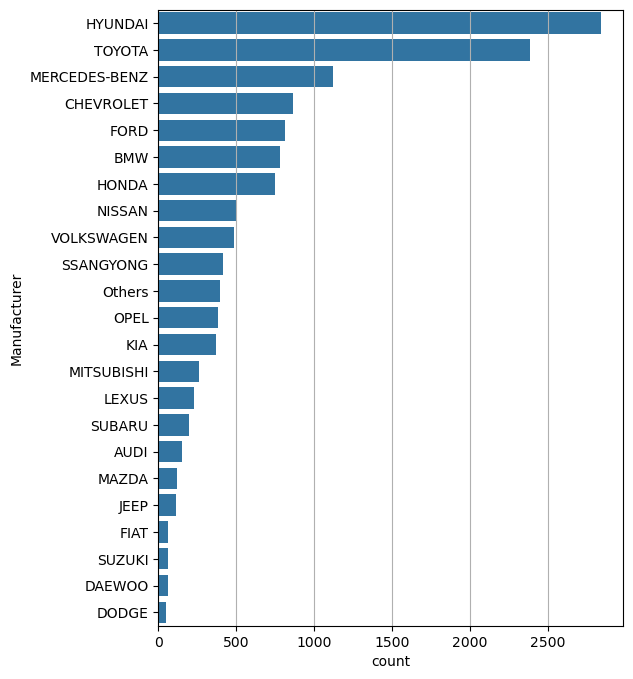

In [76]:
plt.figure(figsize=(6, 8))
plt.grid()
sns.barplot(data.Manufacturer.value_counts(),orient="y")

In [77]:
data.head(3)

,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Price_log,Mileage_log,Volume_log
0,1399,LEXUS,2010,Jeep,Yes,Hybrid,6.0,Automatic,4x4,Left wheel,Silver,12,9.497697,12.133534,1.504077
1,1018,CHEVROLET,2011,Jeep,No,Petrol,6.0,Tiptronic,4x4,Left wheel,Black,8,9.718482,12.165256,1.386294
2,906,HONDA,2006,Hatchback,No,Petrol,4.0,Variator,Front,Right-hand drive,Black,2,9.044050,12.206078,0.832909


In [78]:
data["Prod. year"].value_counts()


Prod. year
2012    1430
2014    1340
2013    1335
2016    1063
2015    1050
2011    1011
2010     932
2017     632
2008     471
2009     429
2007     402
2018     334
2005     328
2004     305
2003     301
2000     259
2006     258
2002     254
2001     230
1999     191
1998     187
2019     162
1997     142
1996      98
1995      94
1994      37
2020      37
1992      27
1993      20
1990      12
1991      10
1988       8
1989       5
1986       5
1987       5
1985       3
1953       3
1977       2
1964       2
1984       1
1957       1
1980       1
1982       1
1981       1
Name: count, dtype: int64

In [79]:
scaler = StandardScaler()
data["Levy"] = scaler.fit_transform(data[["Levy"]])
data["Prod. year"] = scaler.fit_transform(data[["Prod. year"]])
data["Cylinders"] = scaler.fit_transform(data[["Cylinders"]])
data["Airbags"] = scaler.fit_transform(data[["Airbags"]])
data["Volume_log"] = scaler.fit_transform(data[["Volume_log"]])
data["Mileage_log"] = scaler.fit_transform(data[["Mileage_log"]])
data["Price_log"] = scaler.fit_transform(data[["Price_log"]])


In [80]:
data.head()

,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Price_log,Mileage_log,Volume_log
0,1.837600,LEXUS,-0.076539,Jeep,Yes,Hybrid,1.738319,Automatic,4x4,Left wheel,Silver,1.533405,-0.200984,0.422354,2.070815
1,0.524311,CHEVROLET,0.094555,Jeep,No,Petrol,1.738319,Tiptronic,4x4,Left wheel,Black,0.483383,0.106457,0.436160,1.439571
2,0.138252,HONDA,-0.760914,Hatchback,No,Petrol,-0.379769,Variator,Front,Right-hand drive,Black,-1.091651,-0.832683,0.453926,-1.526232
3,-0.013414,FORD,0.094555,Jeep,Yes,Hybrid,-0.379769,Automatic,4x4,Left wheel,White,-1.616662,-2.020672,0.380540,0.723925
4,-1.447346,HONDA,0.607836,Hatchback,Yes,Petrol,-0.379769,Automatic,Front,Left wheel,Silver,-0.566640,-0.379290,0.115500,-1.526232


In [81]:
data.columns

Index(['Levy', 'Manufacturer', 'Prod. year', 'Category', 'Leather interior',
       'Fuel type', 'Cylinders', 'Gear box type', 'Drive wheels', 'Wheel',
       'Color', 'Airbags', 'Price_log', 'Mileage_log', 'Volume_log'],
      dtype='object')

In [82]:
x= data[['Levy', 'Manufacturer', 'Prod. year', 'Category', 'Leather interior',
       'Fuel type', 'Cylinders', 'Gear box type', 'Drive wheels', 'Wheel',
       'Color', 'Airbags', 'Mileage_log', 'Volume_log']]
y = data["Price_log"]

In [83]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [84]:
cat_cols = x.select_dtypes(include='object').columns


In [85]:
encoder = TargetEncoder()
X_train[cat_cols] = encoder.fit_transform(X_train[cat_cols], y_train)
X_test[cat_cols] = encoder.transform(X_test[cat_cols])

In [88]:
svr = SVR(kernel="rbf",
        C=300,
        epsilon=0.5)
svr.fit(X_train, y_train)

SVR(C=300, epsilon=0.5)

In [89]:
predicted = svr.predict(X_test)

In [90]:
mean_squared_error(y_test,predicted)

0.41977374310112947

In [91]:
r2_score(y_test,predicted)

0.5837736885078812

In [94]:
tree = DecisionTreeRegressor(
max_depth=10,
min_samples_split=5,
random_state=42)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=42)

In [95]:
pred = tree.predict(X_test)


In [96]:
mean_squared_error(y_test,pred)

0.4252644766546247

In [97]:
r2_score(y_test,pred)

0.578329356145705

In [98]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [100]:
pred2 = lr.predict(X_test)

In [101]:
mean_squared_error(y_test,pred2)

0.6150484456201976

In [103]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [104]:
pred = lasso.predict(X_test)

In [105]:
mean_squared_error(y_test,pred)

1.0085228852861714

In [106]:
r2_score(y_test,pred)

-4.168179446040199e-08

In [107]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [108]:
pred = ridge.predict(X_test)
mean_squared_error(pred,y_test)

0.6149443339553671

In [109]:
r2_score(pred,y_test)

-0.4452797831476367